In [150]:
%run Algorithms.ipynb


Graph: Graph with 9 nodes and 12 edges
Minimum Vertex Cover found: {0, 1, 2, 4} 4


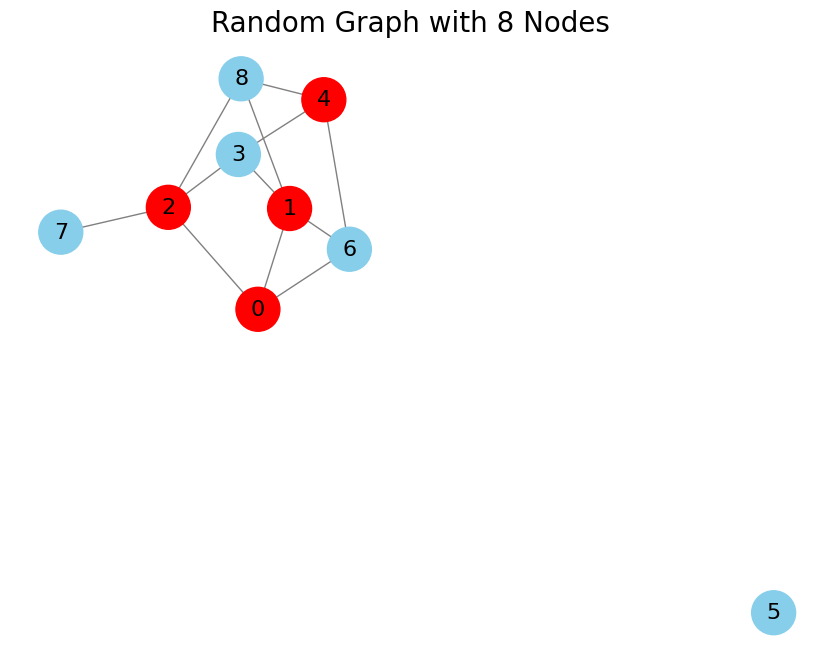

Graph: Graph with 9 nodes and 12 edges
Minimum Vertex Cover found: {0, 1, 2, 4} 4


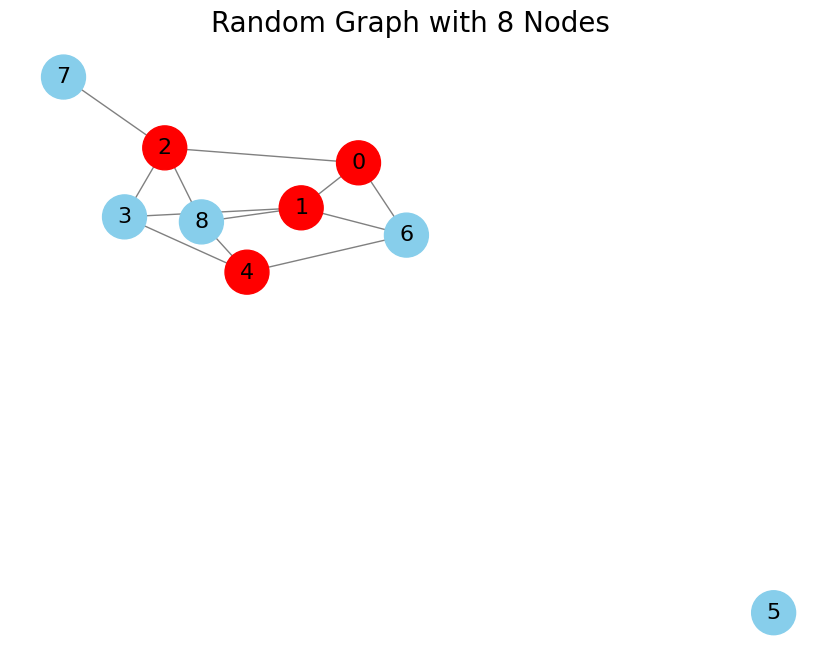

In [151]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(9, 0.5)

print("Graph:", G)
vertex_cover, best_cost = brute_force(G)
print("Minimum Vertex Cover found:", vertex_cover, best_cost)

plt.figure(figsize=(8, 6))
node_colors = ['skyblue' if node not in vertex_cover else 'red' for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=node_colors, node_size=1000, font_size=16, edge_color='gray', font_color='black')
plt.title("Random Graph with 8 Nodes", size=20)
plt.show()
#----------------------------------------------------
max_iter = 100

best_solution, best_cost = simulated_annealing(G, max_iter)
print("Graph:", G)
print("Minimum Vertex Cover found:", best_solution, best_cost)

plt.figure(figsize=(8, 6))
node_colors = ['skyblue' if node not in best_solution else 'red' for node in G.nodes()]

nx.draw(G, with_labels=True, node_color=node_colors, node_size=1000, font_size=16, edge_color='gray', font_color='black')
plt.title("Random Graph with 8 Nodes", size=20)
plt.show()